In [1]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
########################################     A D R       S T R A T E G Y       ############################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

In [2]:
# CLEAR VAR
from clearall import clearall
clearall()

In [3]:
# LIBRAIRIES
import pandas as pd
import numpy as np
import time
import talib
import datetime as dt
#from zigzag import *
from sklearn.preprocessing import MinMaxScaler
import pyttsx3
import joblib
from matplotlib import pyplot as plt
scaler = MinMaxScaler(feature_range=(0, 1))
engine = pyttsx3.init()

%%time
_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
##### Chargement des bases
x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'

##### On charge la base, et on enlève les colonnes inutiles pour ce modèle
df = pd.read_csv('Base_Clean/'+x.replace('/','')+_period+'.csv')
df = df.drop(['HigMax','LowMin','Total'],axis=1)
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'],axis=1)
df['TimeRange']= [df.index[i].strftime(format='%Y-%m-%d') for i in range(len(df))]

##### On enlève les samedis et les dimanches
df['TOTO'] = [None if pd.to_datetime(df.TimeRange[i]).weekday() == 5 or pd.to_datetime(df.TimeRange[i]).weekday() == 6 else 999 for i in range(len(df.index))]
df = df.dropna()
df = df.drop(['TOTO'],axis=1)

df.to_csv('Base_Clean/EURUSDm5_clean.csv')

In [4]:
%%time
##### Chargement des bases
x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'

df = pd.read_csv('Base_Clean/EURUSDm5_clean.csv')
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'],axis=1)

df_daily = pd.read_csv('Base_Clean/'+x.replace('/','')+'D1'+'.csv')
df_daily = df_daily.drop(['Total'],axis=1)

df_daily.index = pd.to_datetime(df_daily['Date'])
df_daily = df_daily.drop(['Date'],axis=1)

INDEX = []

for i in range(len(df_daily.index)):
    if df_daily.index[i].hour == 23:
        INDEX.append(pd.to_datetime(df_daily.index[i])+pd.Timedelta(hours=1))
    else:
        INDEX.append(pd.to_datetime(df_daily.index[i]))
df_daily.index = pd.to_datetime(INDEX)

df_daily['TimeRange']= [df_daily.index[i].strftime(format='%Y-%m-%d') for i in range(len(df_daily))]

##### On enlève les samedis et les dimanches
df_daily['TOTO'] = [None if pd.to_datetime(df_daily.TimeRange[i]).weekday() == 5 or pd.to_datetime(df_daily.TimeRange[i]).weekday() == 6 else 999 for i in range(len(df_daily.index))]
df_daily = df_daily.dropna()
df_daily = df_daily.drop(['TOTO'],axis=1)

##### /!\ Remettre le daily au bon jour <== DEPRECATED /!\
#df_daily['TimeRange'] = df_daily['TimeRange'].shift(-1)
#df_daily = df_daily.dropna()
##### /!\ ############################# /!\
df_daily['ADR'] = talib.ATR(df_daily['High'],df_daily['Low'],df_daily['Close'],timeperiod=5)

#df = df.iloc[-int(len(df) * 0.8):-int(len(df) * 0.9),:]
df = df.iloc[-int(len(df) * 0.1):,:]
#df = df[df.TimeRange >= sorted(list(set(df.TimeRange)))[1]] <== DEPRECATED

df_daily = df_daily[(pd.to_datetime(df_daily.TimeRange)>=pd.to_datetime(sorted(list(set(df.TimeRange)))[0]))&(pd.to_datetime(df_daily.TimeRange)<=pd.to_datetime(df.index[-1]))]

df = df[(pd.to_datetime(df.TimeRange)>=pd.to_datetime(df_daily.TimeRange[0]))&(pd.to_datetime(df.TimeRange)<=pd.to_datetime(df_daily.TimeRange[-1]))]

print(len(df))
print(df.index[0],df.index[1],df.index[-1])

print(len(df_daily))
print(df_daily.index[0],df_daily.index[-1])


73766
2019-11-21 18:20:00 2019-11-21 18:25:00 2020-11-23 23:50:00
261
2019-11-21 00:00:00 2020-11-23 00:00:00
CPU times: user 3.57 s, sys: 196 ms, total: 3.76 s
Wall time: 5.35 s


In [80]:
x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'

df_weekly = pd.read_csv('Base_Clean/'+x.replace('/','')+'W1'+'.csv')
df_weekly = df_weekly.drop(['Total'],axis=1)

df_weekly.index = pd.to_datetime(df_weekly['Date'])
df_weekly = df_weekly.drop(['Date'],axis=1)
df_weekly['Pivots'] = (df_weekly.Low+df_weekly.High+df_weekly.Close)/3
df_weekly['R38'] = df_weekly.Pivots+0.382*(df_weekly.High-df_weekly.Low)
df_weekly['R62'] = df_weekly.Pivots+0.618*(df_weekly.High-df_weekly.Low)
df_weekly['R100'] = df_weekly.Pivots+1*(df_weekly.High-df_weekly.Low)
df_weekly['R138'] = df_weekly.Pivots+1.38*(df_weekly.High-df_weekly.Low)
df_weekly['R161'] = df_weekly.Pivots+1.618*(df_weekly.High-df_weekly.Low)
df_weekly['R200'] = df_weekly.Pivots+2*(df_weekly.High-df_weekly.Low)
df_weekly['S38'] = df_weekly.Pivots-0.382*(df_weekly.High-df_weekly.Low)
df_weekly['S62'] = df_weekly.Pivots-0.618*(df_weekly.High-df_weekly.Low)
df_weekly['S100'] = df_weekly.Pivots-1*(df_weekly.High-df_weekly.Low)
df_weekly['S138'] = df_weekly.Pivots-1.38*(df_weekly.High-df_weekly.Low)
df_weekly['S161'] = df_weekly.Pivots-1.618*(df_weekly.High-df_weekly.Low)
df_weekly['S200'] = df_weekly.Pivots-2*(df_weekly.High-df_weekly.Low)
WEEKNUMBER =[]
YEAR = []
for ind in range(len(df_weekly.index)):
    WEEKNUMBER.append(df_weekly.index[ind].week+1)
    YEAR.append(df_weekly.index[ind].year)

df_weekly['WeekNumber'] = WEEKNUMBER
df_weekly['WeekNumber'] = np.where(df_weekly.WeekNumber==53,1,df_weekly.WeekNumber)
df_weekly['Year'] = YEAR
df_weekly['Year'] = np.where(df_weekly.WeekNumber==1 ,df_weekly.Year.shift(-2),df_weekly.Year)
df_weekly.tail()

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,...,R161,R200,S38,S62,S100,S138,S161,S200,WeekNumber,Year
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-24 23:00:00,1.18567,1.18591,1.16394,1.16444,1.18630,1.18630,1.16406,1.16495,1.185985,1.186105,...,1.207366,1.215810,1.163156,1.157939,1.149495,1.141095,1.135834,1.127390,44,2020.0
2020-10-31 23:00:00,1.16444,1.18903,1.16019,1.18725,1.16495,1.18916,1.16031,1.18763,1.164695,1.189095,...,1.225600,1.236618,1.167910,1.161102,1.150083,1.139122,1.132257,1.121238,45,2020.0
2020-11-08 00:00:00,1.18725,1.19195,1.17448,1.18341,1.18763,1.19205,1.17460,1.18360,1.187440,1.192000,...,1.211599,1.218268,1.176679,1.172558,1.165888,1.159254,1.155098,1.148428,46,2020.0
2020-11-15 00:00:00,1.18341,1.18932,1.18135,1.18549,1.18360,1.18943,1.18147,1.18582,1.183505,1.189375,...,1.198367,1.201410,1.182437,1.180558,1.177515,1.174488,1.172593,1.169550,47,2020.0
2020-11-22 00:00:00,1.18549,1.19055,1.17994,1.18632,1.18582,1.19067,1.18005,1.18643,1.185655,1.190610,...,1.202835,1.206890,1.181605,1.179100,1.175045,1.171011,1.168485,1.164430,48,2020.0


In [5]:
%%time
##### Calcul de l'ADR
ADR = []
for i in range(len(df)):
    ADR.append(df_daily[df_daily.TimeRange==df.TimeRange[i]].ADR[0])
   

CPU times: user 56 s, sys: 434 ms, total: 56.5 s
Wall time: 57.1 s


In [6]:
%%time
HIGHMAX = []
LOWMIN = []
c=0
for day in sorted(list(set(df.TimeRange))):
    try:
        highday = df_daily[df_daily.TimeRange<day].High[-1] 
        lowday = df_daily[df_daily.TimeRange<day].Low[-1]
    except:
        c+=1
        highday = 0
        lowday = 0
    for i in range(0,len(df[df.TimeRange==day])):
        HIGHMAX.append(np.where(df[df.TimeRange==day].iloc[:i+1]['High'].max()<highday,highday,df[df.TimeRange==day].iloc[:i+1]['High'].max()))
        LOWMIN.append(np.where(df[df.TimeRange==day].iloc[:i+1]['Low'].min()>lowday,lowday,df[df.TimeRange==day].iloc[:i+1]['Low'].min()))

'''for day in sorted(list(set(df.TimeRange))):
    for i in range(0,len(df[df.TimeRange==day])):
        HIGHMAX.append(df[df.TimeRange==day].iloc[:i+1]['High'].max())
        LOWMIN.append(df[df.TimeRange==day].iloc[:i+1]['Low'].min())'''
sorted(list(set(df.TimeRange)))[0],sorted(list(set(df.TimeRange)))[-1],df.index[0],df.index[-1],len(HIGHMAX),len(LOWMIN),len(df),len(df)-len(LOWMIN)

CPU times: user 25min 14s, sys: 3.77 s, total: 25min 18s
Wall time: 25min 22s


('2019-11-21',
 '2020-11-23',
 Timestamp('2019-11-21 18:20:00'),
 Timestamp('2020-11-23 23:50:00'),
 73766,
 73766,
 73766,
 0)

In [7]:
c

1

In [8]:
%%time
##### Construction de la base
df['ADR'] = ADR
df['HighMax'] = HIGHMAX
df['LowMin'] = LOWMIN
df['ADRHigh'] = df.LowMin + df.ADR
df['ADRLow'] = df.HighMax - df.ADR

##### Sauvegarde de la base
df.to_csv('Base_Clean/EURUSDm5ADR_19_20_de_ouf.csv')
engine.say("Finito caucau")
engine.runAndWait()
#_t2 = dt.datetime.now()
#print("Temps d'excution du BT",str((_t2 - _t1)))

CPU times: user 2.1 s, sys: 38.2 ms, total: 2.14 s
Wall time: 5.32 s


In [4]:
################# COMMENCE LA ##############

In [5]:
%%time

x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'


df = pd.read_csv('Base_Clean/EURUSDm5ADR_19_20.csv') # _de_ouf.csv')

df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'],axis=1)

#df_daily = pd.read_csv('Base_Clean/'+x.replace('/','')+'D1'+'.csv')
#df_daily = df_daily.drop(['Total'],axis=1)

#df_daily.index = pd.to_datetime(df_daily['Date'])
#df_daily = df_daily.drop(['Date'],axis=1)


# On enlève les 20% de la fin qu'on garde pour le OOST
#print('Les 20% de la fin ont été enlevé pour un OOST ultérieur')
#df = df.iloc[:-int(len(df) * 0.2),:]

CPU times: user 241 ms, sys: 45.5 ms, total: 287 ms
Wall time: 288 ms


In [6]:
%%time
#df_daily['ADR'] = talib.ATR(df_daily['High'],df_daily['Low'],df_daily['Close'],timeperiod=5)
#df_daily['TimeRange'] = [df_daily.index[i].strftime(format='%Y-%m-%d') for i in range(len(df_daily))]

##### RENOMMAGE DES COLUMNS
df.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)

##### ETABLISSEMENT DES INPUTS
df['HighClose'] = df['Close'] - df['High'].shift(12)
df['LowClose'] = df['Close'] - df['Low'].shift(12)
df['RetClose'] = df['Close'] - df['Close'].shift(12)
df['ATR'] = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=12) # => Calcul de l'ATR
df['RSIFast'] = talib.RSI(df.Close,timeperiod=14)
df['RSISlow'] = talib.RSI(df.Close,timeperiod=21)
df['RSICross'] = (df['RSIFast'] - df['RSISlow']) / df['RSISlow']
df['CCIFast'] = talib.CCI(df.High,df.Low,df.Close,timeperiod=30)
df['CCISlow'] = talib.CCI(df.High,df.Low,df.Close,timeperiod=50)
df['CCICross'] = (df['CCIFast'] - df['CCISlow']) / df['CCISlow']

df['RSI'] = talib.RSI(df.Close,timeperiod=14)

#from talib import MA_Type
upper, middle, lower = talib.BBANDS(df.Close,timeperiod=5)#, matype=MA_Type.T3)
utput = talib.MOM(df.Close, timeperiod=5)
#df['EMA'] = talib.EMA(df.Close,timeperiod=5)
df['EMA'] = talib.EMA(df.Close,timeperiod=21)
#df['EMA'] = talib.EMA(df.Close,timeperiod=50)
#df['EMA'] = talib.EMA(df.Close,timeperiod=100)
#df['EMA'] = talib.EMA(df.Close,timeperiod=150)
#df['EMA'] = talib.EMA(df.Close,timeperiod=200)
df['Bolup'] = upper
df['Bollow'] = lower
df['Bolmid'] = middle
df['Momentum'] = utput
df['BolCross'] = df['Bolup'] - df['Bollow']
df['BolupClose'] = df['Close'] - df['Bolup']
df['BollowClose'] = df['Close'] - df['Bollow']
df['ATRClose'] = df['Close'] - df['ATR']
df['MomentClose'] = df['Close'] - df['Momentum']

df = df.dropna()


CPU times: user 81.8 ms, sys: 34.1 ms, total: 116 ms
Wall time: 114 ms


In [86]:
%%time
RESISTANCE = []
SUPPORT = []
for i in range(len(df)):
    RESISTANCE.append(df_weekly[(df_weekly.Year == df.index[i].year) & (df_weekly.WeekNumber == df.index[i].week)].R62.values)
    SUPPORT.append(df_weekly[(df_weekly.Year == df.index[i].year) & (df_weekly.WeekNumber == df.index[i].week)].S62.values)
df['R'] = RESISTANCE
df['S'] = SUPPORT




CPU times: user 2min 10s, sys: 620 ms, total: 2min 11s
Wall time: 2min 11s


,Open_Bid,High_Bid,Low_Bid,Close_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Open,High,...,Bollow,Bolmid,Momentum,BolCross,BolupClose,BollowClose,ATRClose,MomentClose,R,S
Date,,,,,,,,,,,,,,,,,,,,,


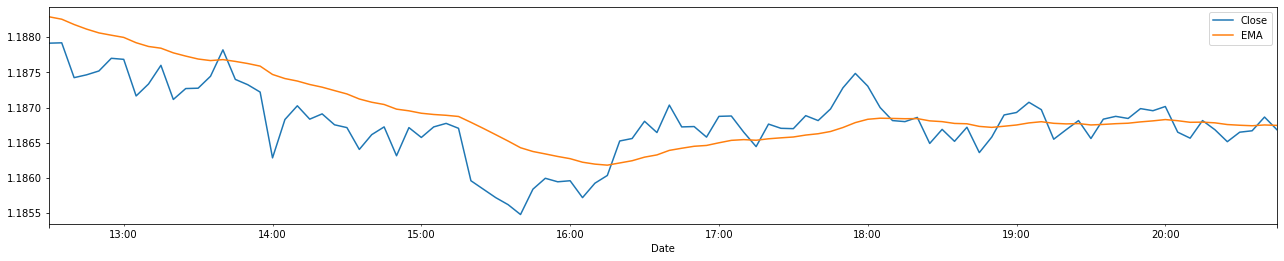

In [87]:

df.iloc[-1000:-900].Close.plot(figsize=(22,4),label='Close')
#df.iloc[-1000:-900].Open.plot(label='Open')
df.iloc[-1000:-900].EMA.plot(label='EMA')
plt.legend()

In [88]:
%%time
##### VANILLA BACKTESTING ######
from bt import *

_year_bottom = df.index[0] # '2018-04-07 22:45:00'
_year_top = df.index[-1] # '2020-05-07 00:55:00'

_nb_bougie_exit = 10
_trigger_reengage = 0
_trigger_target = 0
_trigger_sl = 0
_invers = 0
_trigger_exposure = 10

_confidence = 0.01/100 # <== Pour croisement ADR : Comparaison avec abs(courbe1 - courbe 2)/100
_rsi_conf = 0.1 # <== Pour croisement RSI : Comparaison avec (Fast - Slow) / Slow
_cci_conf = 0.1 # <== Pour croisement CCI : Comparaison avec (Fast - Slow) / Slow
_rsi_up = 70 # <== Borne supérieure du RSI
_rsi_down = 30 # <== Borne inférieure du RSI

_target = 0.001
_sl = 0.002

_verbose = 0

_size = 50000
_cash_ini = 200000
_rate = 1




CPU times: user 177 µs, sys: 5 µs, total: 182 µs
Wall time: 255 µs


In [89]:
#### STRATEGIE ADR #####
#bt_adr(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_exposure,_verbose,_cash_ini,_rate,x,\
 #   _confidence,_target,_invers,_size,_sl,_trigger_sl)

#### STRATEGIE ADR EMA #####
#bt_adr_ema(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_exposure,_verbose,_cash_ini,_rate,x,\
#    _confidence,_target,_invers,_size,_sl,_trigger_sl)

#### STRATEGIE ADR RSI #####
#bt_adr_rsi(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_exposure,_verbose,_cash_ini,_rate,x,\
 #   _confidence,_target,_invers,_size,_sl,_trigger_sl,_rsi_up,_rsi_down)

#### STRATEGIE PIVOTS #####
bt_pivots(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_exposure,_verbose,_cash_ini,_rate,x,\
    _confidence,_target,_invers,_size,_sl,_trigger_sl)

#### STRATEGIE CCI RSI #####
#bt_cci_rsi(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_exposure,_verbose,_cash_ini,_rate,x,\
 #_rsi_conf,_cci_conf,_target,_invers,_size,_sl,_trigger_sl)


Librairies imported

Début des opérations horodatée à 2020-11-30 18:02:10.204534

Chargement de la nouvelle base


 Le rate du ticker EUR/USD est à  1 
Bases chargées
TETEL process effectué
 ENTERING THE BACKTEST 


KeyError: 0

In [13]:
df.R[i][0],df.Low[i]

(1.19222007, 1.18404)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73717 entries, 2019-11-21 22:25:00 to 2020-11-23 23:50:00
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open_Bid     73717 non-null  float64
 1   High_Bid     73717 non-null  float64
 2   Low_Bid      73717 non-null  float64
 3   Close_Bid    73717 non-null  float64
 4   Open_Ask     73717 non-null  float64
 5   High_Ask     73717 non-null  float64
 6   Low_Ask      73717 non-null  float64
 7   Close_Ask    73717 non-null  float64
 8   Open         73717 non-null  float64
 9   High         73717 non-null  float64
 10  Low          73717 non-null  float64
 11  Close        73717 non-null  float64
 12  TimeRange    73717 non-null  object 
 13  ADR          73717 non-null  float64
 14  HighMax      73717 non-null  float64
 15  LowMin       73717 non-null  float64
 16  ADRHigh      73717 non-null  float64
 17  ADRLow       73717 non-null  float64
 18  HighClose  

In [10]:
##########################################
######### ARTIFICIAL INTELLIGENCE ########
##########################################

In [11]:
%%time
# On normalise les inputs entre -1 et 1
df_input = df.copy()
df_input = df_input.loc[:,df_input.columns != 'TimeRange']


df_input['Open_Bid'] = scaler.fit_transform(df_input['Open_Bid'].to_numpy().reshape(-1, 1))
df_input['High_Bid'] = scaler.fit_transform(df_input['High_Bid'].to_numpy().reshape(-1, 1))
df_input['Low_Bid'] = scaler.fit_transform(df_input['Low_Bid'].to_numpy().reshape(-1, 1))
df_input['Close_Bid'] = scaler.fit_transform(df_input['Close_Bid'].to_numpy().reshape(-1, 1))
df_input['Low_Ask'] = scaler.fit_transform(df_input['Low_Ask'].to_numpy().reshape(-1, 1))
df_input['High_Ask'] = scaler.fit_transform(df_input['High_Ask'].to_numpy().reshape(-1, 1))
df_input['Close_Ask'] = scaler.fit_transform(df_input['Close_Ask'].to_numpy().reshape(-1, 1))
df_input['Open'] = scaler.fit_transform(df_input['Open'].to_numpy().reshape(-1, 1))
df_input['High'] = scaler.fit_transform(df_input['High'].to_numpy().reshape(-1, 1))
df_input['High'] = scaler.fit_transform(df_input['High'].to_numpy().reshape(-1, 1))
df_input['Close'] = scaler.fit_transform(df_input['Close'].to_numpy().reshape(-1, 1))
df_input['ADR'] = scaler.fit_transform(df_input['ADR'].to_numpy().reshape(-1, 1))
df_input['HighMax'] = scaler.fit_transform(df_input['HighMax'].to_numpy().reshape(-1, 1))
df_input['LowClose'] = scaler.fit_transform(df_input['LowClose'].to_numpy().reshape(-1, 1))
df_input['LowMin'] = scaler.fit_transform(df_input['LowMin'].to_numpy().reshape(-1, 1))
df_input['ADRHigh'] = scaler.fit_transform(df_input['ADRHigh'].to_numpy().reshape(-1, 1))
df_input['ADRLow'] = scaler.fit_transform(df_input['ADRLow'].to_numpy().reshape(-1, 1))
df_input['HighClose'] = scaler.fit_transform(df_input['HighClose'].to_numpy().reshape(-1, 1))
df_input['LowClose'] = scaler.fit_transform(df_input['LowClose'].to_numpy().reshape(-1, 1))
df_input['RetClose'] = scaler.fit_transform(df_input['RetClose'].to_numpy().reshape(-1, 1))
df_input['ATR'] = scaler.fit_transform(df_input['ATR'].to_numpy().reshape(-1, 1))
df_input['RSIFast'] = scaler.fit_transform(df_input['RSIFast'].to_numpy().reshape(-1, 1))
df_input['RSISlow'] = scaler.fit_transform(df_input['RSISlow'].to_numpy().reshape(-1, 1))
df_input['RSICross'] = scaler.fit_transform(df_input['RSICross'].to_numpy().reshape(-1, 1))
df_input['RSI'] = scaler.fit_transform(df_input['RSI'].to_numpy().reshape(-1, 1))
df_input['EMA'] = scaler.fit_transform(df_input['EMA'].to_numpy().reshape(-1, 1))
df_input['Bolup'] = scaler.fit_transform(df_input['Bolup'].to_numpy().reshape(-1, 1))
df_input['Bollow'] = scaler.fit_transform(df_input['Bollow'].to_numpy().reshape(-1, 1))
df_input['Bolmid'] = scaler.fit_transform(df_input['Bolmid'].to_numpy().reshape(-1, 1))
df_input['Momentum'] = scaler.fit_transform(df_input['Momentum'].to_numpy().reshape(-1, 1))
df_input['BolCross'] = scaler.fit_transform(df_input['BolCross'].to_numpy().reshape(-1, 1))
df_input['BolupClose'] = scaler.fit_transform(df_input['BolupClose'].to_numpy().reshape(-1, 1))
df_input['BollowClose'] = scaler.fit_transform(df_input['BollowClose'].to_numpy().reshape(-1, 1))
df_input['ATRClose'] = scaler.fit_transform(df_input['ATRClose'].to_numpy().reshape(-1, 1))
df_input['MomentClose'] = scaler.fit_transform(df_input['MomentClose'].to_numpy().reshape(-1, 1))


df_input = df_input.dropna()

CPU times: user 62.5 ms, sys: 17.2 ms, total: 79.7 ms
Wall time: 79.7 ms


In [13]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73717 entries, 2019-11-21 22:25:00 to 2020-11-23 23:50:00
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open_Bid     73717 non-null  float64
 1   High_Bid     73717 non-null  float64
 2   Low_Bid      73717 non-null  float64
 3   Close_Bid    73717 non-null  float64
 4   Open_Ask     73717 non-null  float64
 5   High_Ask     73717 non-null  float64
 6   Low_Ask      73717 non-null  float64
 7   Close_Ask    73717 non-null  float64
 8   Open         73717 non-null  float64
 9   High         73717 non-null  float64
 10  Low          73717 non-null  float64
 11  Close        73717 non-null  float64
 12  ADR          73717 non-null  float64
 13  HighMax      73717 non-null  float64
 14  LowMin       73717 non-null  float64
 15  ADRHigh      73717 non-null  float64
 16  ADRLow       73717 non-null  float64
 17  HighClose    73717 non-null  float64
 18  LowClose   

In [ ]:
len(df_input[df_input.Signal == -1]),len(df_input[df_input.Signal == 1]),abs(len(df_input[df_input.Signal == -1])-len(df_input[df_input.Signal == 1])),len(df_input[df_input.Signal == 0]),len(pivots)

In [ ]:

#df.Close.plot(figsize=(22,4),label='Close')
#df.RetClose.iloc[-48:].plot(label='RetClose')
df_input.RetClose.iloc[-480:].plot(figsize=(22,4))
df_input.CCICross.iloc[-480:].plot()
df_input.RSICross.iloc[-480:].plot()
(df_input.CCICross.iloc[-480:]-df_input.RSICross.iloc[-480:]).plot()
plt.hlines(y=0,xmin=df.iloc[-480:].index[0],xmax=df.iloc[-480:].index[-1],color='pink')


In [16]:
from multiclass_svm import modelize
_model = 'multiclass_svm'

df = df.dropna()
_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df_input,x,_model)
print("\n\n ===> MODELISATION terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

Début des opérations horodatée à 2020-11-23 12:10:37.316794
 Multi class Support Vector Machine pour  EUR/USD 
Modèle : multiclass_svm
COMPUTING
Signaux Counter({-1.0: 1354, 1.0: 1095, 0.0: 26})

LONGUEUR INPUT : 2475
HEAD DES INPUTS : Empty DataFrame
Columns: [RSICross, CCICross, HighClose, LowClose, ATRClose, BolCross, BolupClose, BollowClose, MomentClose, RetClose]
Index: []
 Multiclass pour  EUR/USD 

Achat - Accuracy : 82.23 %
Achat - Precision : 82.23 %
Achat - Recall : 82.23 %
Achat - F-measure: : 82.23 % 


              precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84       948
         0.0       0.00      0.00      0.00        18
         1.0       0.80      0.81      0.81       767

    accuracy                           0.82      1733
   macro avg       0.55      0.55      0.55      1733
weighted avg       0.81      0.82      0.82      1733

[[801   0 147]
 [ 10   0   8]
 [143   0 624]]


 Joblib Model  JOBLIB/multiclass_svm/SaveEURUSDm5.

In [24]:
%%time
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
import colorama as col
print(col.Fore.GREEN+'###############################################################################################################################################################\n###############################################################################################################################################################\n######################################################################      O O S T      ######################################################################\n###############################################################################################################################################################\n###############################################################################################################################################################',col.Style.RESET_ALL)



df = pd.read_csv('Base_Clean/EURUSDm5ADR.csv')
#df = df.drop(['HigMax','LowMin','Total'],axis=1)


print('Les 20% de la fin ont été enlevé pour un OOST ultérieur')
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'],axis=1)

df_daily = pd.read_csv('Base_Clean/'+x.replace('/','')+'D1'+'.csv')
df_daily = df_daily.drop(['Total'],axis=1)

print('Les 20% de la fin sont utilisés pour un OOST')


# On enlève les 20% de la fin qu'on garde pour le OOST
df = df.iloc[-int(len(df) * 0.2):,:]


price = df.copy()

#price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Préparation des inputs\n')

price = price.dropna()

price['HighADRHigh'] = price['High'] - price['ADRHigh']
price['LowADRLow'] = price['Low'] - price['ADRLow']

price['Signal'] = np.where((price['Close'] - price['High'].shift(12)).shift(-1)>0.002*price['High'],1,np.where((price['Close'] - price['Low'].shift(12)).shift(-1)<0.002*price['Low'],-1,0))

price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)

price['HighClose'] = price['Close'] - price['High'].shift(12)
price['LowClose'] = price['Close'] - price['Low'].shift(12)
price['RetClose'] = price['Close'] - price['Close'].shift(12)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'],timeperiod=12) # => Calcul de l'ATR
price['RSIFast'] = talib.RSI(price.Close,timeperiod=5)
price['RSISlow'] = talib.RSI(price.Close,timeperiod=15)
price['RSICross'] = price['RSIFast'] - price['RSISlow']
price['CCIFast'] = talib.CCI(price.High,price.Low,price.Close,timeperiod=5)
price['CCISlow'] = talib.CCI(price.High,price.Low,price.Close,timeperiod=15)
price['CCICross'] = price['CCIFast'] - price['CCISlow']
#from talib import MA_Type
upper, middle, lower = talib.BBANDS(price.Close,timeperiod=5)#, matype=MA_Type.T3)
utput = talib.MOM(price.Close, timeperiod=5)

price['Bolup'] = upper
price['Bollow'] = lower
price['Bolmid'] = middle
price['Momentum'] = utput
price['BolCross'] = price['Bolup'] - price['Bollow']
price['BolupClose'] = price['Close'] - price['Bolup']
price['BollowClose'] = price['Close'] - price['Bollow']
price['ATRClose'] = price['Close'] - price['ATR']
price['MomentClose'] = price['Close'] - price['Momentum']

price.Signal = price.Signal.shift(-1) # => On met le Signal de la bougie d'après à la ligne d'avant pour l'apprentissage

price = price.dropna()

# On normalise les inputs entre -1 et 1
price_input = price.copy()
price_input = price_input[['RSICross','CCICross','HighClose','LowClose','ATRClose','BolCross','BolupClose','BollowClose','MomentClose','RetClose','Signal']]
price_input['RSICross'] = scaler.fit_transform(price_input['RSICross'].to_numpy().reshape(-1, 1))
price_input['CCICross'] = scaler.fit_transform(price_input['CCICross'].to_numpy().reshape(-1, 1))
price_input['HighClose'] = scaler.fit_transform(price_input['HighClose'].to_numpy().reshape(-1, 1))
price_input['LowClose'] = scaler.fit_transform(price_input['LowClose'].to_numpy().reshape(-1, 1))
price_input['ATRClose'] = scaler.fit_transform(price_input['ATRClose'].to_numpy().reshape(-1, 1))
price_input['BolCross'] = scaler.fit_transform(price_input['BolCross'].to_numpy().reshape(-1, 1))
price_input['BolupClose'] = scaler.fit_transform(price_input['BolupClose'].to_numpy().reshape(-1, 1))
price_input['BollowClose'] = scaler.fit_transform(price_input['BollowClose'].to_numpy().reshape(-1, 1))
price_input['MomentClose'] = scaler.fit_transform(price_input['MomentClose'].to_numpy().reshape(-1, 1))
price_input['RetClose'] = scaler.fit_transform(price_input['RetClose'].to_numpy().reshape(-1, 1))
price_input = price_input.dropna()
print('1')
resultat = pd.DataFrame()
resultat = resultat.reindex_like(price)
resultat['Controle'] = price.Signal.to_list()
print('2')
price_input = price_input.drop(['Signal'],axis=1)
print('3')
print(len(price),len(price_input))
loaded_model = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5.sav')
price['Signal'] = loaded_model.predict(price_input)
#price['Probab'] = 999
#price['Proba'] = loaded_model.predict_proba(price_input) * 100

print('4')
#price['Probab'] = loaded_modelb.predict_proba(price[['ATR','Return3']])[:][1]*100
#price['Probav'] = loaded_modelv.predict_proba(price[['ATR','Return3']])[:][1]*100

print('None/BUY/SELL/TOTAL:',len(price[price.Signal==0]),len(price[price.Signal==1]),len(price[price.Signal==-1]),len(price))

print('Bases chargées')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)


accu = round(loaded_model.score(resultat['Controle'], price['Signal']) * 100,2)
prec = round(loaded_model.precision_score(resultat['Controle'], price['Signal']) * 100,2)
recall = round(loaded_model.recall_score(resultat['Controle'], price['Signal']) * 100,2)
f1 = round(loaded_model.f1_score(resultat['Controle'], price['Signal']) * 100,2)
print(col.Fore.BLUE,'Achat pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accu > 69 and prec > 69 :
    print(col.Fore.GREEN)
elif accu < 51 or prec < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accu,'%')
print('Achat - Precision :',prec,'%')
print('Achat - Recall :', recall,'%')
print('Achat - F-measure: :' ,f1,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], price['Signal']))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], price['Signal']))
print('\n',conf_matrix)
print('\n')





###############################################################################################################################################################
###############################################################################################################################################################
######################################################################      O O S T      ######################################################################
###############################################################################################################################################################
############################################################################################################################################################### 
Les 20% de la fin ont été enlevé pour un OOST ultérieur
Les 20% de la fin sont utilisés pour un OOST
Préparation des inputs

1
2
3
602 602
4
None/BUY/SELL/TOTAL: 0 252 350 602
Bases chargées
TETEL pr

ValueError: Expected 2D array, got 1D array instead:
array=[ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1.  0.  1. -1. -1. -1. -1. -1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1.  0.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.
  1.  0.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
  0. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.
 -1.  0. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1.
  1.  1.  1. -1. -1. -1.  1.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
###########
## BT VANILLA => TIME EXIT AND/OR REVERSAL SIGNAL
#######

In [21]:
%%time



Importing Librairies...
Librairies imported

Début des opérations horodatée à 2020-11-18 22:32:14.967147

Chargement de la nouvelle base


 Le rate du ticker EUR/USD est à  1 
Bases chargées
TETEL process effectué
 ENTERING THE BACKTEST 
(pas de duration)
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  -24642.0 !. En  3280   transactions.
 
Nbre de winners : 1352 
 
Nbre de loosers : 1927 
Temps d'excution du BT 0:00:15.976475
CPU times: user 9.92 s, sys: 45.7 ms, total: 9.97 s
Wall time: 19 s


In [44]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
try:
    print(col.Fore.CYAN,'Winners Ratio :',\
        round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),\
            '%',col.Style.RESET_ALL)
except:
    print(col.Fore.CYAN,'Winners Ratio  :None',col.Style.RESET_ALL)

print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
print('Max Exposure',max(EXPO_MAX),'x ',_size,'= ',max(EXPO_MAX)*_size,'$')

#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-04-07 22:45:00  à 2020-05-07 00:55:00 
 Total Number of trades 390 
Started Cash : 50000
P&L  in currency:  12079.0$ 
P&L in %:  6.04% 
Average trade duration NA
# Winners  280
# Loosers  110
Cumulated gains 38003.0
Cumulated losses -25924.0
 PROFIT FACTOR :  1.47 
 Winners Ratio : 71.79 % 
Average Winners 131.5
Average Loosers -89.7
Average pnl 41.8
% Average Winners 0.07
% Average Loosers -0.04
% Average pnl 0.09
Number of opened trades 289
Number of closed trades 390
Max Exposure 10 x  50000 =  500000 $


CPU times: user 7.98 s, sys: 35.1 ms, total: 8.01 s
Wall time: 8.01 s


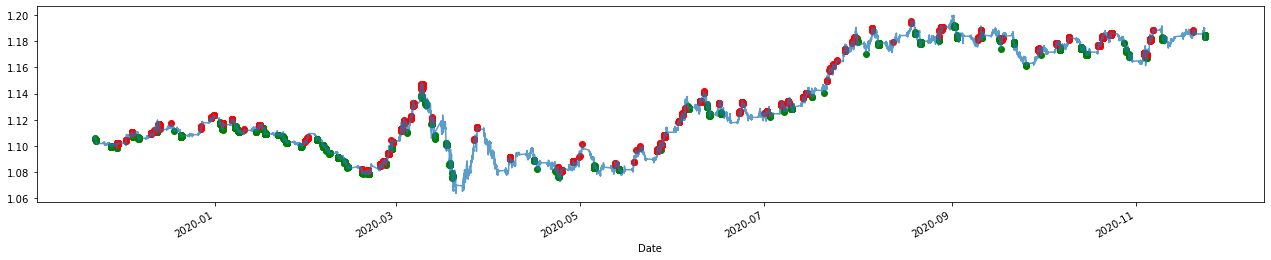

In [13]:
%%time
##### PLOTING SIGNALS FROM ADR STRAT #####
SIGNALS = []
for i in range(0,len(df)):
    if  abs(df.ADRLow[i] - df.Low[i])/100 < _confidence:
        SIGNALS.append(1)
    elif abs(df.ADRHigh[i] - df.High[i])/100 < _confidence:
        SIGNALS.append(-1)
    else:
        SIGNALS.append(0)
df['Signals'] = SIGNALS
df.Close.plot(figsize=(22,4),alpha=0.72)
plt.scatter(df[df.Signals == 1].index, df[df.Signals == 1].Close, color='g')
plt.scatter(df[df.Signals == -1].index, df[df.Signals == -1].Close, color='r')

<function confusion_matrix at 0x1a155fdcb0>


In [ ]:
#and price.Signal[i-2] == -1 and price.Signal[i-3] == -1\
            #and price.Signal[i-4] == -1 and price.Signal[i-5] == -1 and price.Signal[i-6] == -1 and price.Signal[i-7] == -1\
             #   and price.Signal[i-8] == -1 and price.Signal[i-9] == -1 and price.Signal[i-10] == -1 and price.Signal[i-11] == -1\
              #      and price.Signal[i-12] == -1 and price.Signal[i-13] == -1 and price.Signal[i-14] == -1 and price.Signal[i-15] == -1\
               #         and price.Signal[i-16] == -1 and price.Signal[i-17] == -1 and price.Signal[i-18] == -1 and price.Signal[i-19] == -1\
                #            and price.Signal[i-20] == -1 and price.Signal[i-21] == -1 and price.Signal[i-22] == -1 and price.Signal[i-23] == -1\
                 #               and price.Signal[i-24] == -1 and price.Signal[i-25] == -1 and price.Signal[i-26] == -1 and price.Signal[i-27] == -1\
                  #                  and price.Signal[i-28] == -1 and price.Signal[i-29] == -1 and price.Signal[i-30] == -1 and price.Signal[i-31] == -1\
                   #                     and price.Signal[i-32] == -1 and price.Signal[i-33] == -1 and price.Signal[i-34] == -1 and price.Signal[i-35] == -1\
                    #                        and price.Signal[i-36] == -1 and price.Signal[i-37] == -1 and price.Signal[i-38] == -1 and price.Signal[i-39] == -1: 

In [ ]:
#and price.Signal[i-2] == 1 and price.Signal[i-3] == 1 \
            #and price.Signal[i-4] == 1 and price.Signal[i-5] == 1 and price.Signal[i-6] == 1 and price.Signal[i-7] == 1\
             #   and price.Signal[i-8] == 1 and price.Signal[i-9] == 1 and price.Signal[i-10] == 1 and price.Signal[i-11] == 1 \
              #      and price.Signal[i-12] == 1 and price.Signal[i-13] == 1 and price.Signal[i-14] == 1 and price.Signal[i-15] == 1\
               #         and price.Signal[i-16] == 1 and price.Signal[i-17] == 1 and price.Signal[i-18] == 1 and price.Signal[i-19] == 1\
                #            and price.Signal[i-20] == 1 and price.Signal[i-21] == 1 and price.Signal[i-22] == 1 and price.Signal[i-23] == 1 \
                 #               and price.Signal[i-24] == 1 and price.Signal[i-25] == 1 and price.Signal[i-26] == 1 and price.Signal[i-27] == 1\
                  #                  and price.Signal[i-28] == 1 and price.Signal[i-29] == 1 and price.Signal[i-30] == 1 and price.Signal[i-31] == 1\
                   #                     and price.Signal[i-32] == 1 and price.Signal[i-33] == 1 and price.Signal[i-34] == 1 and price.Signal[i-35] == 1 \
                    #                        and price.Signal[i-36] == 1 and price.Signal[i-37] == 1 and price.Signal[i-38] == 1 and price.Signal[i-39] == 1:

In [33]:
len()

751400

In [80]:
df = pd.read_csv('Base_Clean/'+x.replace('/','')+_period+'.csv')
df = df.iloc[-int(len(df) * 0.2):,:]
df = df.drop(['HigMax','LowMin','Total'],axis=1)
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'],axis=1)
print('Longueur df',len(df))
price = df.copy()

#price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Préparation des inputs\n')

price['Return3Neg'] = (price['CloseAsk'] - price['CloseBid'].shift(3))/price['CloseBid'].shift(3) # => Calcul des return qui devront être négatifs
price['Return3Pos'] = (price['CloseBid'] - price['CloseAsk'].shift(3))/price['CloseAsk'].shift(3) # => Calcul des return qui devront être positifs

price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)

# On remplit la colonne return avec les négatifs de Return3Neg et les positifs de Return3Pos
price['Return3'] = np.where(price['Return3Pos']>0,price['Return3Pos'],np.where(price['Return3Neg']<0,price['Return3Neg'],0)) 

price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'],timeperiod=5) # => Calcul de l'ATR
INDEX_REMOVE = []
INDEX_REMOVE.append(price[price.isnull().values].index)
price = price.dropna()
df_Signal = pd.DataFrame()
df_Signal = df_Signal.reindex_like(price)
print('Test longueur après dropna (price/df_Signal)',len(price),len(df_Signal))
df_Signal['Signal'] = np.where(price['Return3']>0,1,np.where(price['Return3']<0,-1,0))
df_Signal.Signal = df_Signal.Signal.shift(-1) # => On met le Signal de la bougie d'après à la ligne d'avant pour l'apprentissage
df_Signal = df_Signal[['Signal']]
# On normalise les inputs entre -1 et 1
price['Return3'] = scaler.fit_transform(price['Return3'].to_numpy().reshape(-1, 1))
price['ATR'] = scaler.fit_transform(price['ATR'].to_numpy().reshape(-1, 1))


loaded_modelb = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5_buy.sav')
price['Signalb'] = loaded_modelb.predict(price[['ATR','Return3']])

loaded_modelv = joblib.load('JOBLIB/'+_model+'/SaveEURUSDm5_sell.sav')
price['Signalv'] = loaded_modelv.predict(price[['ATR','Return3']])


#price['Probab'] = loaded_modelb.predict_proba(price[['ATR','Return3']])[:][1]*100
#price['Probav'] = loaded_modelv.predict_proba(price[['ATR','Return3']])[:][1]*100

print('Max Buy Signal Number 0/1/0+1:',len(price[price.Signalb==0]),len(price[price.Signalb==1]),len(price))
print('Max sell Signal Number 0/1/0+1:',len(price[price.Signalv==0]),len(price[price.Signalv==1]),len(price))

print('Bases chargées')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

Longueur df 150281
Préparation des inputs

Test longueur après dropna (price/df_Signal) 150276 150276
Max Buy Signal Number 0/1/0+1: 149550 726 150276
Max sell Signal Number 0/1/0+1: 276 150000 150276
Bases chargées
TETEL process effectué
 ENTERING THE BACKTEST 


In [87]:
resultat = pd.DataFrame()
resultat = resultat.reindex_like(df_Signal)
resultat['Controle'] = df_Signal.Signal.to_list()

resultat['Controleb'] = np.where(resultat['Controle']==1,1,0) 

accub = round(accuracy_score(resultat['Controleb'], price['Signalb']) * 100,2)
precb = round(precision_score(resultat['Controleb'], price['Signalb']) * 100,2)
recallb = round(recall_score(resultat['Controleb'], price['Signalb']) * 100,2)
f1b = round(f1_score(resultat['Controleb'], price['Signalb']) * 100,2)
print(col.Fore.BLUE,'Achat pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controleb'], price['Signalb']))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controleb'], price['Signalb']))
print('\n',conf_matrix)
print('\n')

########

resultatv = pd.DataFrame()
resultatv = resultatv.reindex_like(resultat)
resultatv['Controlev'] = np.where(resultat['Controle']==-1,1,0)

resultat['Controlev'] = resultatv['Controlev']

accuv = round(accuracy_score(resultat['Controlev'], price['Signalv']) * 100,2)
precv = round(precision_score(resultat['Controlev'], price['Signalv']) * 100,2)
recallv = round(recall_score(resultat['Controlev'], price['Signalv']) * 100,2)
f1v = round(f1_score(resultat['Controlev'], price['Signalv']) * 100,2)
print(col.Fore.BLUE,'Vente pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accuv > 69 and precv > 69 :
    print(col.Fore.GREEN)
elif accuv < 51 or precv < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Vente - Accuracy :' ,accuv,'%')
print('Vente - Precision :',precv,'%')
print('Vente - Recall :', recallv,'%')
print('Vente - F-measure: :' ,f1v,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controlev'], price['Signalv']))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controlev'], price['Signalv']))
print('\n',conf_matrix)
print('\n')

 Achat pour  EUR/USD 

Achat - Accuracy : 69.74 %
Achat - Precision : 45.87 %
Achat - Recall : 0.73 %
Achat - F-measure: : 1.44 % 



              precision    recall  f1-score   support

           0       0.70      1.00      0.82    104856
           1       0.46      0.01      0.01     45420

    accuracy                           0.70    150276
   macro avg       0.58      0.50      0.42    150276
weighted avg       0.63      0.70      0.58    150276

[[104463    393]
 [ 45087    333]]

               Vrais_estimés    Faux_estimés
vrais_réels  Vrais_positifs    Faux_négatif
Faux_réels    Faux_positifs  Vrais-négatifs


 Vente pour  EUR/USD 

Vente - Accuracy : 30.09 %
Vente - Precision : 30.07 %
Vente - Recall : 99.64 %
Vente - F-measure: : 46.2 % 



              precision    recall  f1-score   support

           0       0.40      0.00      0.00    105004
           1       0.30      1.00      0.46     45272

    accuracy                           0.30    150276
   macro avg   

In [83]:
len(resultat),len(resultatv)

(150276, 150281)

In [31]:
len(price[price.Signalb==0]),len(price)-price[price.Signalb==1].Signalb.sum(),len(price)

(119531, 119531, 120218)

In [55]:
len(df_Signal),len(df),len(df_Signal)-len(df)

(150276, 150281, -5)

In [67]:
for ind in INDEX_REMOVE[0]:
    print(ind)

2018-09-04 22:35:00
2018-09-04 22:35:00
2018-09-04 22:35:00
2018-09-04 22:40:00
2018-09-04 22:40:00
2018-09-04 22:40:00
2018-09-04 22:45:00
2018-09-04 22:45:00
2018-09-04 22:45:00
2018-09-04 22:50:00
2018-09-04 22:55:00


In [71]:
ind

Timestamp('2018-09-04 22:35:00')

In [75]:
resultatv[resultatv.index=='2018-09-04 22:35:00']

NameError: name 'resultatv' is not defined